# Importing Libraries 

In [98]:
import pandas as pd # package for high-performance, easy-to-use data structures and data analysis
import numpy as np # fundamental package for scientific computing with Python
import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
# from plotly import tools
# import plotly.tools as tls
# import squarify
# from mpl_toolkits.basemap import Basemap
# from numpy import array
# from matplotlib import cm

# import cufflinks and offline mode
import cufflinks as cf
cf.go_offline()

%matplotlib inline 

# Loading Python objects

In [8]:
application_train = pd.read_pickle('objects/application_train')
application_test=pd.read_pickle('objects/application_test')
bureau=pd.read_pickle('objects/bureau')
bureau_balance=pd.read_pickle('objects/bureau_balance')
previous_application=pd.read_pickle('objects/previous_application')
installments_payments=pd.read_pickle('objects/installments_application')
credit_card_balance=pd.read_pickle('objects/credit_card_balance')
POS_CASH_balance=pd.read_pickle('objects/POS_CASH_balance')

# Bar Plot function 

In [74]:
def barPlot(data,var,title,size,perc):
    temp=data[var].value_counts()
    df=pd.DataFrame({'labels' : temp.index,'values': temp.values,'percentage' : temp.values/sum(temp.values)})
    plt.figure(figsize=size)
    plt.title(title)
    
    if(perc==True):
        sns.barplot(x='labels',y='percentage',data=df)
        locs,labels=plt.xticks()
        plt.show()
    else:
        sns.barplot(x='labels',y='values',data=df)
        locs,labels=plt.xticks()
        plt.show()

# Plotting Barplots for Variables 

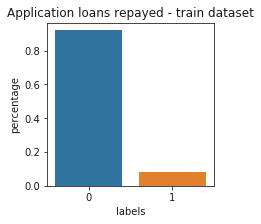

In [87]:
barPlot(application_train,'TARGET','Application loans repayed - train dataset',(3,3),True)

In [194]:
def barCharts(data,feat1,feat2,feat3,feat4,horizontal_layout,size,ws,hs):
    temp1=data[feat1].value_counts()
    temp2=data[feat2].value_counts()
    temp3=data[feat3].value_counts()
    temp4=data[feat4].value_counts()
    
    
    df1=pd.DataFrame({feat1:temp1.index,'value':temp1.values,'percentage' : temp1.values/sum(temp1.values)})
    df2=pd.DataFrame({feat2:temp2.index,'value':temp2.values,'percentage' : temp2.values/sum(temp2.values)})
    df3=pd.DataFrame({feat3:temp3.index,'value':temp3.values,'percentage' : temp3.values/sum(temp3.values)})
    df4=pd.DataFrame({feat4:temp4.index,'value':temp4.values,'percentage' : temp4.values/sum(temp4.values)})
    
    
    if(horizontal_layout):
        fig, (ax1, ax2,ax3,ax4) = plt.subplots(ncols=4, figsize=size)
    else:
        fig, (ax1, ax2,ax3,ax4) = plt.subplots(nrows=4, figsize=size)
    
    #fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=size)
    sns.set_color_codes("pastel")
    
    s=sns.barplot(ax=ax1,x=feat1,y="percentage",data=df1)
    s=sns.barplot(ax=ax2,x=feat2,y="percentage",data=df2)
    s=sns.barplot(ax=ax3,x=feat3,y="percentage",data=df3)
    s=sns.barplot(ax=ax4,x=feat4,y="percentage",data=df4)
    
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace= ws , hspace=hs)    
    
    plt.tick_params(axis='both', which='major', labelsize=10)
    

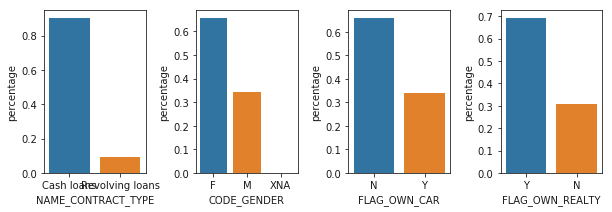

In [195]:
barCharts(application_train,'NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY',True,(10,3),0.5,0.5)

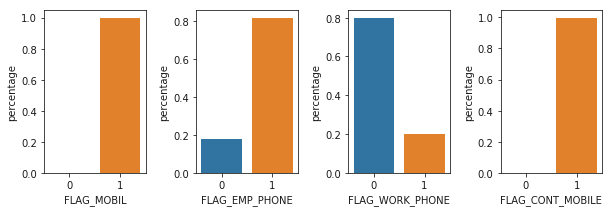

In [196]:
barCharts(application_train,'FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',True,(10,3),0.5,0.5)

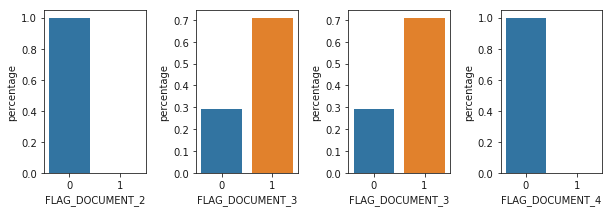

In [197]:
barCharts(application_train,'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4',True,(10,3),0.5,0.5)

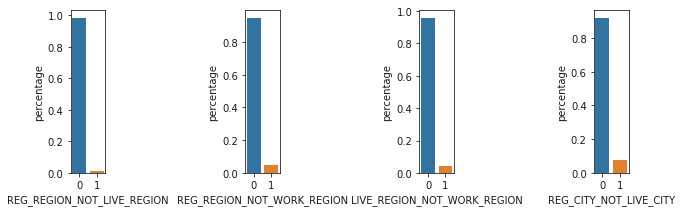

In [198]:
barCharts(application_train,'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY',True,(10,3),4,0.5)

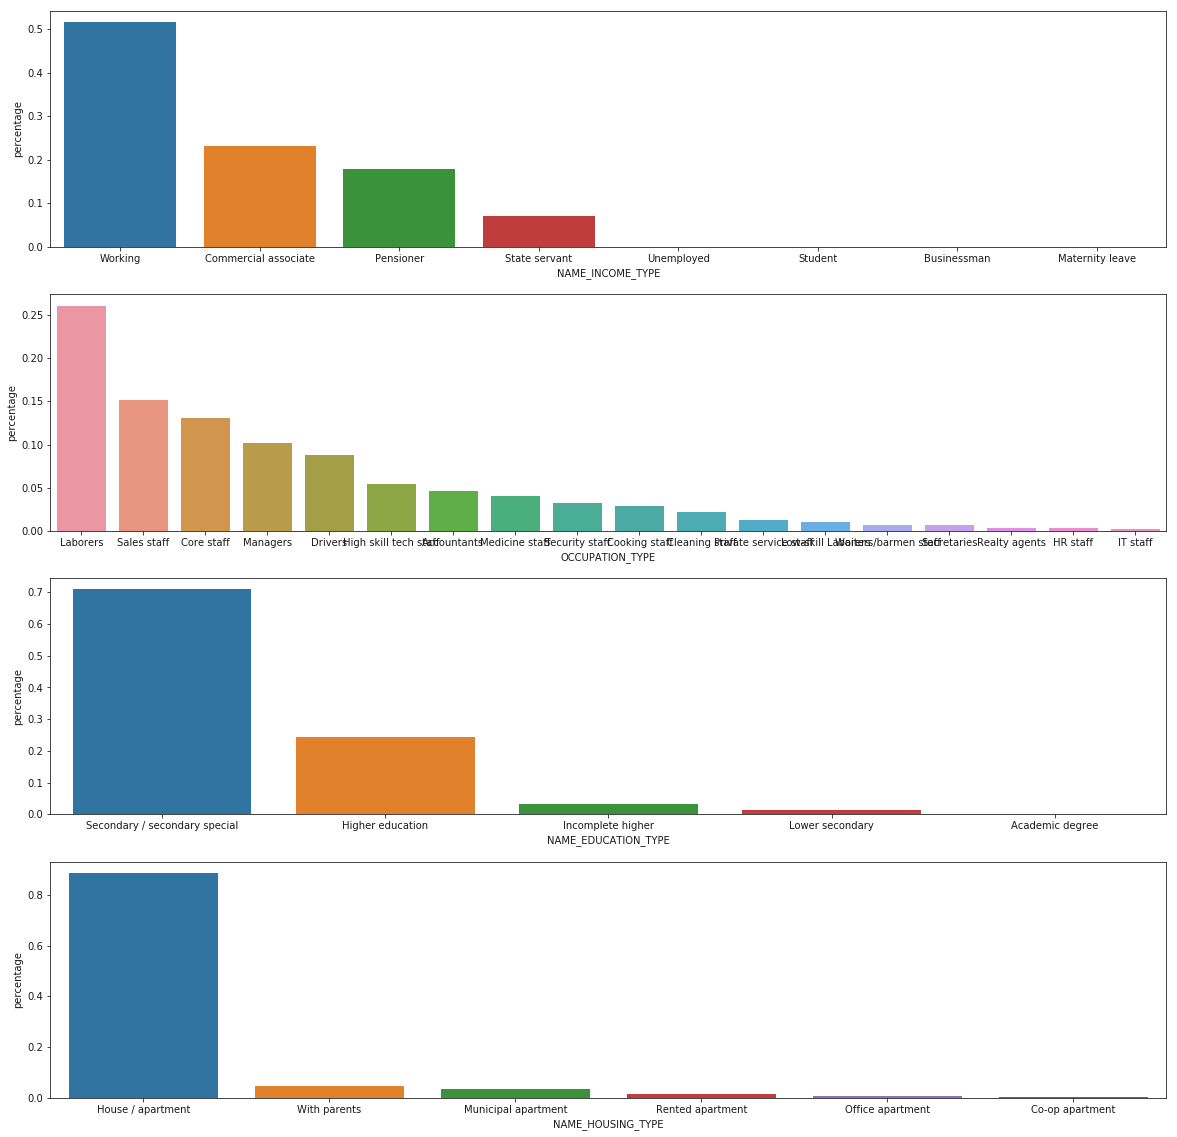

In [200]:
barCharts(application_train,'NAME_INCOME_TYPE','OCCUPATION_TYPE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE',False,(20,20),0.5,0.2)

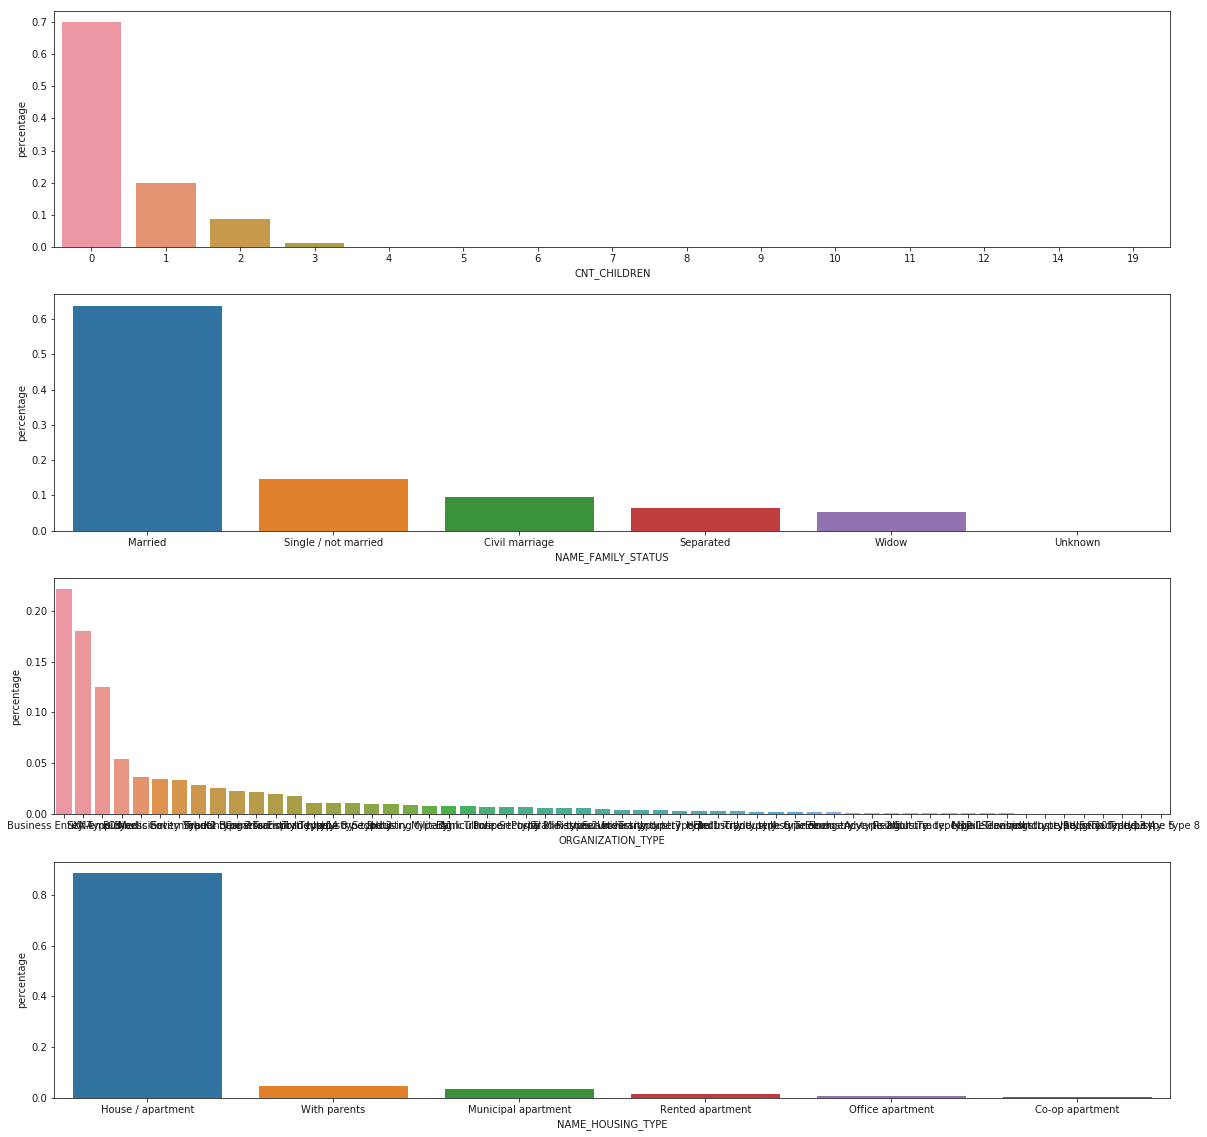

In [223]:
barCharts(application_train,'CNT_CHILDREN','NAME_FAMILY_STATUS','ORGANIZATION_TYPE','NAME_HOUSING_TYPE',False,(20,20),0.5,0.2)

# Stacked Bar chart 

In [217]:
def stackBarChart(data,target,feat1,feat2,feat3,feat4,horizontal_layout,size,ws,hs):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=size)
    
    test = application_train.groupby([feat1, target])[target].count().unstack(feat1).fillna(0)
    test.plot(ax=ax1,kind='bar', stacked=True)
    test = application_train.groupby([feat2, target])[target].count().unstack(feat2).fillna(0)
    test.plot(ax=ax2,kind='bar', stacked=True)
    test = application_train.groupby([feat3, target])[target].count().unstack(feat3).fillna(0)
    test.plot(ax=ax3,kind='bar', stacked=True)
    test = application_train.groupby([feat4, target])[target].count().unstack(feat4).fillna(0)
    test.plot(ax=ax4,kind='bar', stacked=True)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None,wspace= 0.5 , hspace=0.5)  

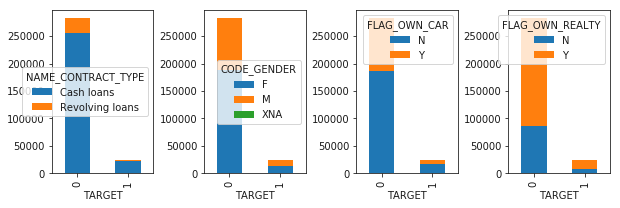

In [218]:
stackBarChart(application_train,'TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY',True,(10,3),0.5,0.5)

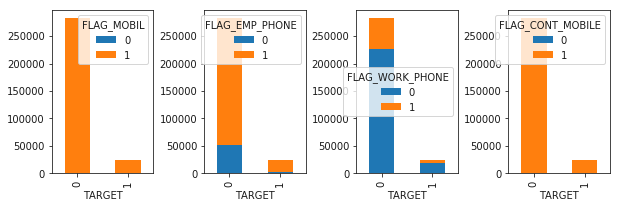

In [220]:
stackBarChart(application_train,'TARGET','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',True,(10,3),0.5,0.5)

In [235]:
# Plot distribution of one feature
def plot_distribution(feature,color):  
    plt.figure(figsize=(10,6))   
    plt.title("Distribution of %s" % feature)   
    sns.distplot(application_train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()

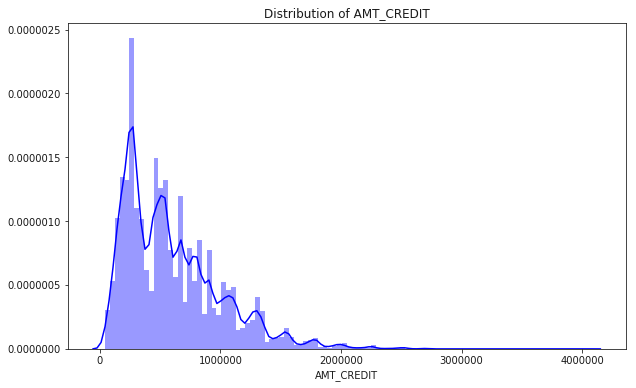

In [236]:
plot_distribution('AMT_CREDIT','blue')


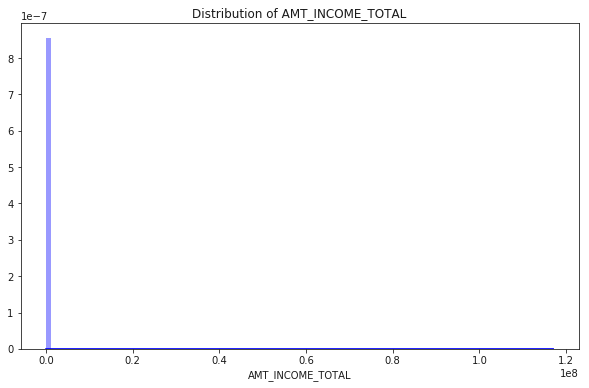

In [228]:
plot_distribution('AMT_INCOME_TOTAL','blue')

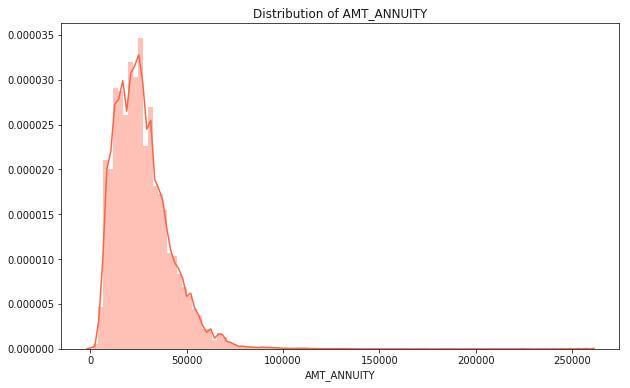

In [229]:
plot_distribution('AMT_ANNUITY','tomato')

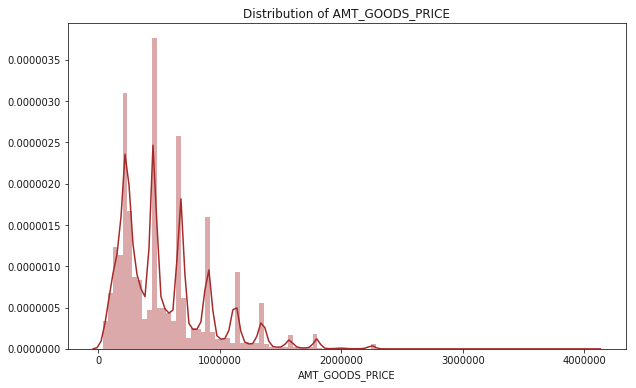

In [230]:
plot_distribution('AMT_GOODS_PRICE','brown')

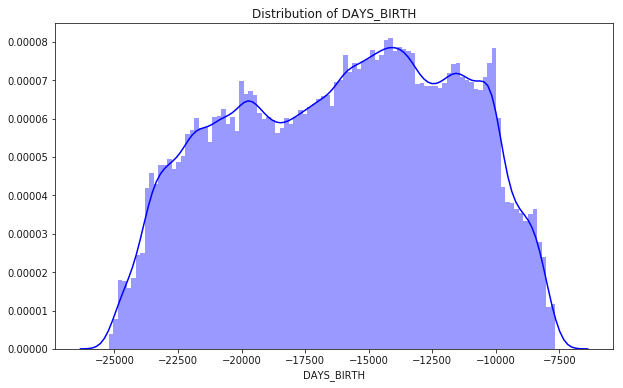

In [231]:
plot_distribution('DAYS_BIRTH','blue')

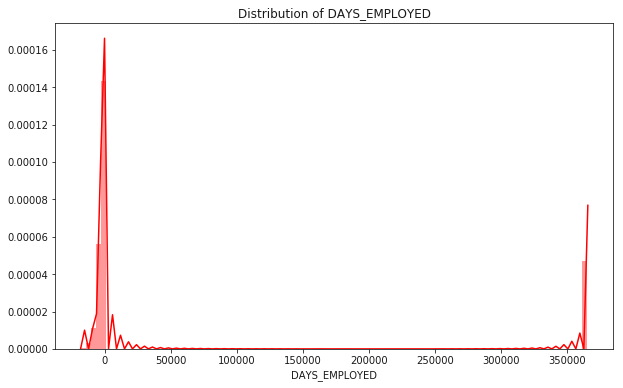

In [232]:
plot_distribution('DAYS_EMPLOYED','red')

In [239]:
def plot_distribution_comp(var,nrow=2):
    
    i = 0
    t1 = application_train.loc[application_train['TARGET'] != 0]
    t0 = application_train.loc[application_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


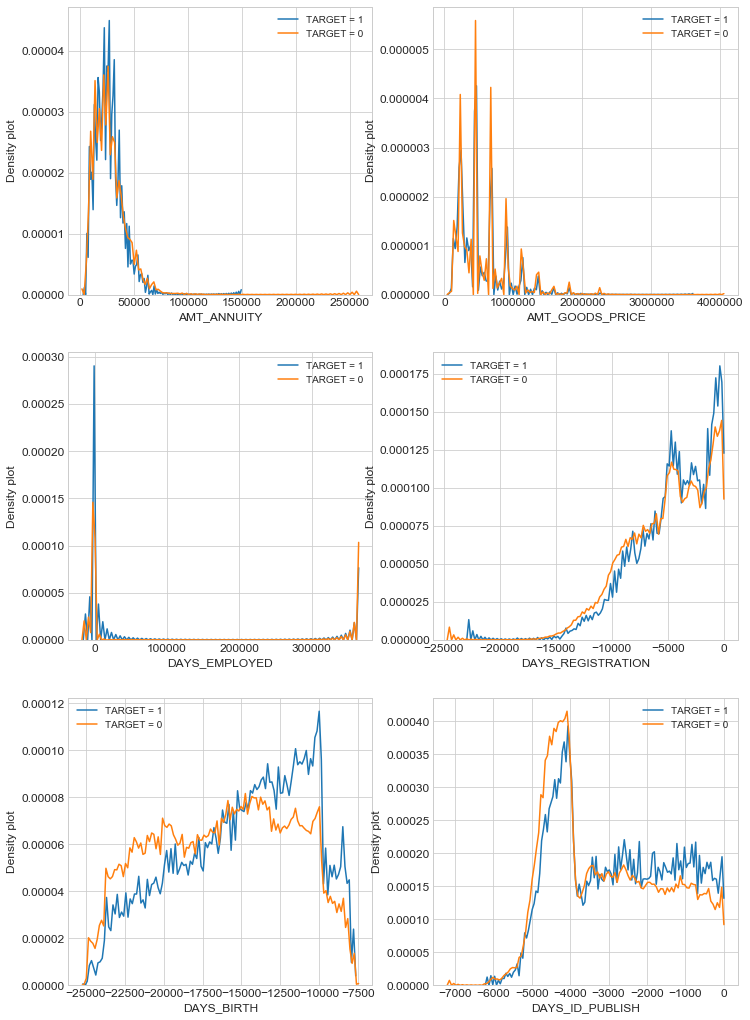

In [240]:
var = ['AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_BIRTH','DAYS_ID_PUBLISH']
plot_distribution_comp(var,nrow=3)

In [255]:
temp = application_train["NAME_FAMILY_STATUS"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Family Status of Applicant\'s', hole = 0.5)

In [256]:
temp = application_train["CNT_CHILDREN"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Number of children\'s', hole = 0.5)

In [257]:
temp = application_train["ORGANIZATION_TYPE"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='ORGANIZATION_TYPE\'s', hole = 0.5)
#CNT_CHILDREN','NAME_FAMILY_STATUS','ORGANIZATION_TYPE','NAME_HOUSING_TYPE